In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/cars.csv')
data.head(3)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.


In [3]:
data.shape

(261, 8)

In [4]:
data = data.sample(frac=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 53 to 211
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [8]:
data.columns = data.columns.str.lstrip()
#because column names had spaces

In [9]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [10]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [12]:
data.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [15]:
data.shape

(256, 8)

In [16]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
53,24.0,4,116.0,75,2158.0,16,1974,0
55,16.0,8,400.0,230,4278.0,10,1974,2
246,19.4,8,318.0,140,3735.0,13,1979,2
179,31.5,4,98.0,68,2045.0,19,1978,1
63,46.6,4,86.0,65,2110.0,18,1981,1


In [17]:
x = pd.DataFrame(data, columns=['mpg', 'cubicinches', 'cylinders', 'hp'])
y = data['brand']

Text(0, 0.5, 'Weights')

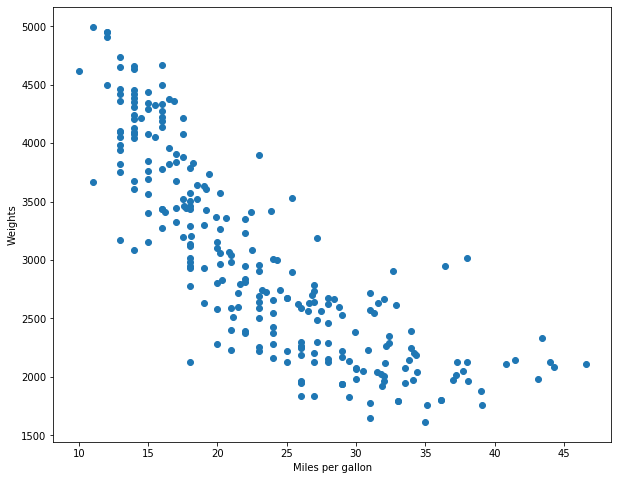

In [18]:
plt.figure(figsize=(10,8))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel('Miles per gallon')
plt.ylabel('Weights')

In [19]:
from sklearn.cluster import KMeans

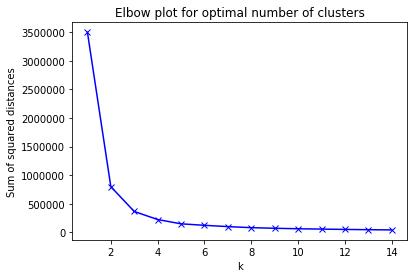

In [20]:
sum_of_squared_errors = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(x)
    
    sum_of_squared_errors.append(k_means.inertia_)

plt.plot(K, sum_of_squared_errors, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()


In [21]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(x)

In [22]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, k_means.labels_)
print("Score : ", score)

Score :  0.6323149311159748


In [23]:
from sklearn.metrics import homogeneity_score
hmg_score = homogeneity_score(y, k_means.labels_)

print("Homogeneity Score : ", hmg_score)

Homogeneity Score :  0.31550036277564175


In [24]:
from sklearn.metrics import v_measure_score
vm_score = v_measure_score(y, k_means.labels_)

print("V measure Score : ", vm_score)

V measure Score :  0.3003375614022765


In [25]:
from sklearn.metrics import completeness_score
comp_score = completeness_score(y, k_means.labels_)

print("Completeness Score : ", comp_score)

Completeness Score :  0.28656536273532296


In [26]:
from sklearn.metrics import adjusted_rand_score
adj_r_score = adjusted_rand_score(y, k_means.labels_)

print("Adjusted Random Score : ", adj_r_score)

Adjusted Random Score :  0.11281925794858025


In [29]:
from sklearn.metrics import adjusted_mutual_info_score
adj_mutual_score = adjusted_mutual_info_score(y, k_means.labels_, average_method='arithmetic')

print("Adjusted Mutual Score : ", adj_mutual_score)

Adjusted Mutual Score :  0.29459818425329665
